In [78]:
import os, sys, glob
import numpy as np
import scipy.signal as sigpro
import scipy.linalg as scpla

from tqdm.notebook import tqdm
import math
import string

%matplotlib notebook
import matplotlib.pyplot as plt

# Problem 15

(100, 100)
60941
{'pts': array([[0, 0]]), 'cost': 0, 'heur': 198, 'done': False}
path complete 741 


<IPython.core.display.Javascript object>


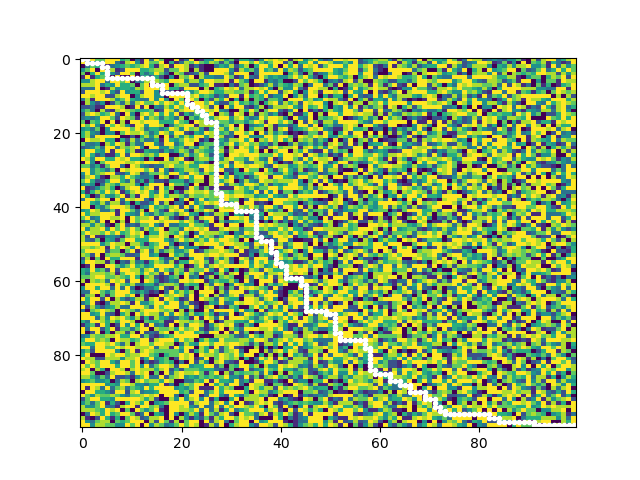

diff 0 to 0 is 0
Dict cost 741, calc 741


<IPython.core.display.Javascript object>


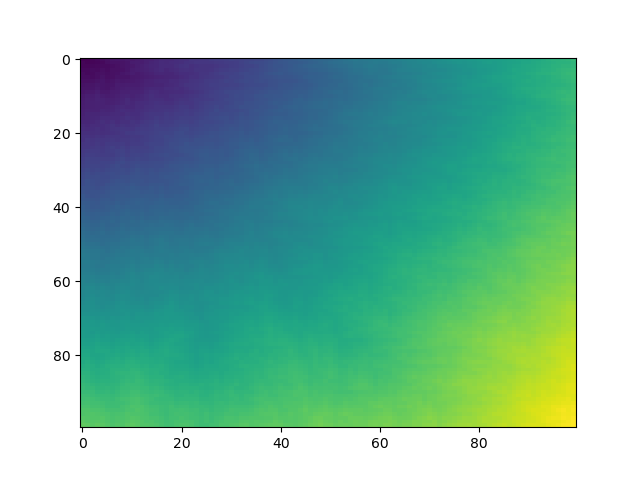

In [129]:
if True:
    with open('p15a_input.txt', 'r') as fid:
        data_in = fid.read().strip().split('\n')
else:
    data_in =  ['1163751742',
                '1381373672',
                '2136511328',
                '3694931569',
                '7463417111',
                '1319128137',
                '1359912421',
                '3125421639',
                '1293138521',
                '2311944581']

n = len(data_in)
m = len(data_in[0])

cpth = np.zeros((n,m), dtype='int')
for pln, ln in enumerate(data_in):
    for plm, l in enumerate(ln):
        cpth[pln, plm] = int(l)

print(cpth.shape)

    
def vitpath(cost_map, pst=np.array([0,0], dtype='int'), 
            pnd=np.array([-1,-1], dtype='int'), maxpaths=2**14):
    nxtpst = np.array([[0,1],[1,0],[0,-1],[-1,0]], dtype='int')
    n,m = cost_map.shape
    mrks = ['w.', 'bx', 'r+', 'b.']
    if pnd[0] < 0:
        pnd[0] = n-1
        pnd[1] = m-1
    paths=[]
    paths.append({'pts':np.atleast_2d(pst), 'cost':0, 'heur':np.sum(np.abs(pst-pnd)), 'done':False})
    
    high = np.sum(cost_map)
    print(high)
    best_map = high*np.ones((n,m), dtype='int')
    path_map = -1*np.ones((n,m), dtype='int')
    
    best_map[pst[0], pst[1]] = 0
    path_map[pst[0], pst[1]] = 0
    conter = 0
    while True:
        conter += 1
        if conter == 100000000:
            break
        pth = paths.pop(0)
        
        if len(paths) == 0:
            print(pth)
        
        if not pth['done']:
            #build the four new points
            first = True
            for ii in range(4):
                ph = pth['pts'][-1,:]+nxtpst[ii,:]
                if 0<=ph[0]<n and 0<=ph[1]<m:
                    
                    nc = pth['cost'] + cost_map[ph[0], ph[1]]
                    nh = np.sum(np.abs(ph-pnd))
                    if nc < best_map[ph[0], ph[1]]:
                        if best_map[ph[0], ph[1]] < high:
                            for ip in range(len(paths)):
                                ipth = len(paths)-1-ip
                                pen = np.sum(np.abs(paths[ipth]['pts'] - np.atleast_2d(ph)), axis=1)
                                if pen.min() == 0 and not paths[ipth]['done']:
                                    #print('removing path {}'.format(ipth))
                                    #print('contains {} was {} now {}'.format(ph, best_map[ph[0], ph[1]], nc))
                                    #print(paths[ipth])
                                    #print
                                    del paths[ipth]


                        best_map[ph[0], ph[1]] = nc
                        #add this one
                        first = False
                        if ph[0]==pnd[0] and ph[1]==pnd[1]:
                            paths.append({'pts':np.concatenate([pth['pts'], np.atleast_2d(ph)], axis=0),
                                       'cost':nc, 'heur':0, 'done':True})
                            print('path complete {} '.format(nc))
                        else:
                            paths.append({'pts':np.concatenate([pth['pts'], np.atleast_2d(ph)], axis=0),
                                       'cost':nc, 'heur':nh, 'done':False})
            #if first:
            #    print('nothing put away')
        else:
            paths.append(pth)
            
        #print(paths)

        cst = np.array([p['cost']+p['heur'] for p in paths])
        
        if len(paths) > maxpaths:
            cst_sort = np.sort(cst)
            for ip in range(len(paths)):
                ipth = len(paths)-1-ip
                if paths[ipth]['cost'] + paths[ipth]['heur'] > cst_sort[maxpaths]:
                    del paths[ipth]
        
        cst = np.array([p['cost']+p['heur'] for p in paths])
        complete = np.array([int(p['done']) for p in paths], dtype='int')
        bestpath = cst.argmin()
        
        if complete[bestpath]:
            break
        
        #print('min path cost {} max {}, {} complete, {} active'.format(paths[0]['cost'], paths[-1]['cost'], np.sum(complete), len(paths)))
            
    _=plt.figure()
    _=plt.imshow(cost_map, aspect='auto')
    colorwheel = ['w', 'b', 'k', 'r', 'g']
    for ip, p in enumerate(paths):
        colr = colorwheel.pop(0)
        if p['pts'].shape[0] == paths[bestpath]['pts'].shape[0]:
            print('diff {} to {} is {}'.format(bestpath, ip, np.sum(np.abs(paths[bestpath]['pts']-p['pts']))))
        css = -cost_map[p['pts'][0,0], pth['pts'][0,1]]
        for pos in p['pts']:
            _=plt.plot(pos[1], pos[0], '{}.'.format(colr))
            css += cost_map[pos[0], pos[1]]
        colorwheel.append(colr)
        print('Dict cost {}, calc {}'.format(p['cost'], css))
    
    _=plt.figure()
    best_map[best_map == high] = -1
    _=plt.imshow(best_map, aspect='auto')
    #_=plt.imshow(10*np.log10(1+best_map), aspect='auto')
    
    
    return paths[bestpath]
                                
                                
                            

bp1 = vitpath(cpth, pst=np.array([0,0], dtype='int'), pnd=np.array([-1,-1], dtype='int'))

1184856
{'pts': array([[0, 0]]), 'cost': 0, 'heur': 998, 'done': False}
path complete 2983 
path complete 2976 


<IPython.core.display.Javascript object>


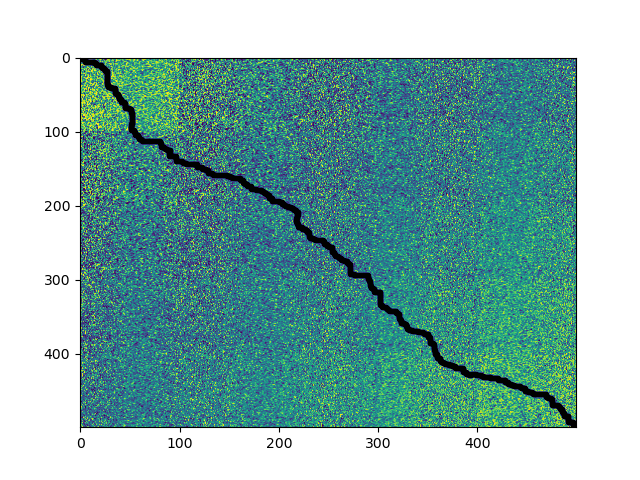

diff 1 to 0 is 2
Dict cost 2983, calc 2983
diff 1 to 1 is 0
Dict cost 2976, calc 2976
diff 1 to 2 is 2
Dict cost 2976, calc 2976


<IPython.core.display.Javascript object>


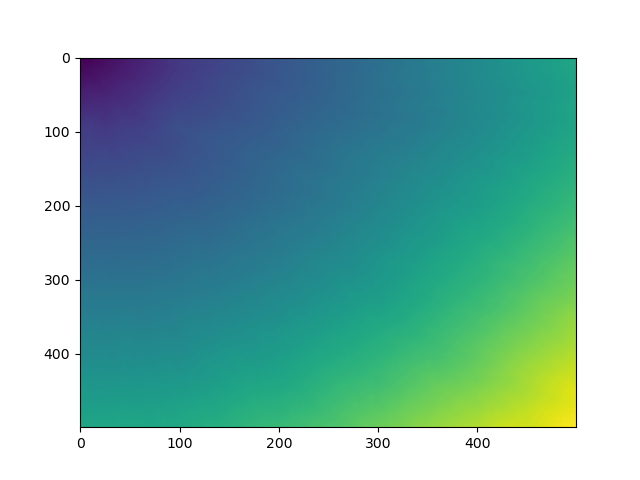

In [130]:
cpfull = np.zeros((500,500), dtype='int')
cpp = np.zeros((100,100,9), dtype='int')
cpp[:,:,0] = cpth
#print(np.sum(cpp))
for ii in range(1,9):
    cpp[:,:,ii] = 1 + cpp[:,:,ii-1]
    cpp[cpp==10] = 1

cpfull[:100,:][:,:100] = cpp[:,:,0]
cpfull[:100,:][:,100:200] = cpp[:,:,1]
cpfull[:100,:][:,200:300] = cpp[:,:,2]
cpfull[:100,:][:,300:400] = cpp[:,:,3]
cpfull[:100,:][:,400:500] = cpp[:,:,4]

cpfull[100:200,:][:,:100] = cpp[:,:,1]
cpfull[100:200,:][:,100:200] = cpp[:,:,2]
cpfull[100:200,:][:,200:300] = cpp[:,:,3]
cpfull[100:200,:][:,300:400] = cpp[:,:,4]
cpfull[100:200,:][:,400:500] = cpp[:,:,5]

cpfull[200:300,:][:,:100] = cpp[:,:,2]
cpfull[200:300,:][:,100:200] = cpp[:,:,3]
cpfull[200:300,:][:,200:300] = cpp[:,:,4]
cpfull[200:300,:][:,300:400] = cpp[:,:,5]
cpfull[200:300,:][:,400:500] = cpp[:,:,6]

cpfull[300:400,:][:,:100] = cpp[:,:,3]
cpfull[300:400,:][:,100:200] = cpp[:,:,4]
cpfull[300:400,:][:,200:300] = cpp[:,:,5]
cpfull[300:400,:][:,300:400] = cpp[:,:,6]
cpfull[300:400,:][:,400:500] = cpp[:,:,7]

cpfull[400:500,:][:,:100] = cpp[:,:,4]
cpfull[400:500,:][:,100:200] = cpp[:,:,5]
cpfull[400:500,:][:,200:300] = cpp[:,:,6]
cpfull[400:500,:][:,300:400] = cpp[:,:,7]
cpfull[400:500,:][:,400:500] = cpp[:,:,8]

#print(cpfull.shape)
#print(np.sum(cpfull))

bp2 = vitpath(cpfull, pst=np.array([0,0], dtype='int'), pnd=np.array([-1,-1], dtype='int'))


In [89]:
aa = [[2],[445,4],[4,5,6,7,8,9,10]]
print(aa)
del aa[1]
print(aa)

[[2], [445, 4], [4, 5, 6, 7, 8, 9, 10]]
[[2], [4, 5, 6, 7, 8, 9, 10]]
